task 2

In [1]:
import numpy as np
from scipy.stats import multivariate_normal


In [3]:
K = 2
X = np.array([
    [1,2], [2,2], [2,1], [0,0], [0,-1], [-1,-2]
    ], dtype='float')
epsilon = 1e-6
N, M = X.shape
pi = np.array([0.5, 0.5])
mu = np.array([
    [1, 1], [-1 , -1]
])
covar = np.array([
    np.eye(2) , np.eye(2)
])
responsibilities = np.random.uniform(0, 1, size=(N, K))
responsibilities =responsibilities / np.sum(responsibilities, axis=1)[:,np.newaxis]

# expectation
for j in range(K):
    responsibilities[:, j] = pi[j] * multivariate_normal.pdf(X, mu[j], covar[j])
responsibilities =responsibilities / np.sum(responsibilities, axis=1)[:,np.newaxis]

# maximization
for j in range(K):
    N_K = np.sum(responsibilities, axis=0)[j]
    pi[j] = N_K/N
    mu[j] = (responsibilities[:,j].T@X)/N_K
    covar[j] = ((responsibilities[:,j] * ((X - mu[j]).T)) @ (X - mu[j])) / N_K

print("responsibilities", responsibilities)
print("pi", pi)
print("mu", mu)
print("covar-matrix", covar)

responsibilities [[9.97527377e-01 2.47262316e-03]
 [9.99664650e-01 3.35350130e-04]
 [9.97527377e-01 2.47262316e-03]
 [5.00000000e-01 5.00000000e-01]
 [1.19202922e-01 8.80797078e-01]
 [2.47262316e-03 9.97527377e-01]]
pi [0.60273249 0.39726751]
mu [[ 1  1]
 [ 0 -1]]
covar-matrix [[[0.72621643 0.48471095]
  [0.48471095 0.82852049]]

 [[0.42424473 0.42660081]
  [0.42660081 0.64301325]]]


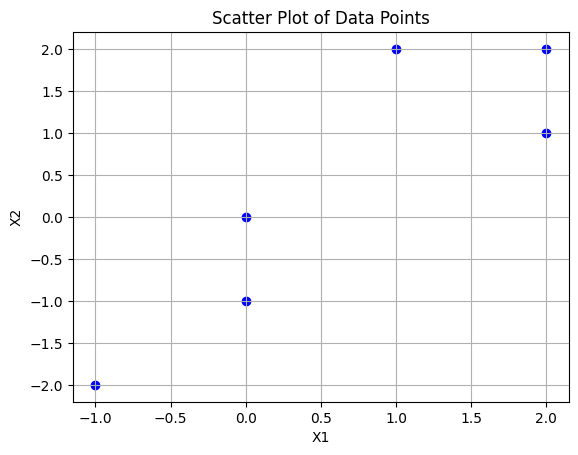

In [4]:
import matplotlib.pyplot as plt

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.title('Scatter Plot of Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [11]:
X = np.array(
    [
        [1,2], [2,2], [2,1], [1,1]
    ]
)
mu = np.sum(X, axis=0)/X.shape[0]
print(f'mu is {mu}')
A = X - mu
print(A.T)
print(A)

mu is [1.5 1.5]
[[-0.5  0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]]
[[-0.5  0.5]
 [ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5 -0.5]]
